## Kaggle house pricing competition

#### Importing the needed packages:

In [26]:
## Importing the packages:

import pandas as pd
import numpy as np
        

#### Importing the datasets:

In [27]:
## Importing and displaing the data:

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')


In [28]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Feature descriptions:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Cleaning up the dataset:

In [29]:
## Some stats about the dataset:

# The data size:

print("The train data size is : {} ".format(train.shape))
print("The test data size is : {} ".format(test.shape))

The train data size is : (1460, 81) 
The test data size is : (1459, 80) 


In [30]:
nan_stats = train.isnull().sum()

nan_stats_test = test.isnull().sum()

nan_stats[nan_stats != 0] ## Displays the number of nan's in columns which have missing/nan values: 


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [31]:
## Missing value stats in the test dataset:
nan_stats_test[nan_stats_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

#### Investigating the features:

In [32]:
## Dealing with the NA/nan values:

## Changing NA/nan to None for features where they apply:

train["PoolQC"] = train["PoolQC"].fillna("none") # nan in the PoolQC field means that there is no pool, hence does not apply
train["MiscFeature"] = train["MiscFeature"].fillna("none") # nan means no misc features exist
train["Alley"] = train["Alley"].fillna("none") # nan = no alley access
train["Fence"] = train["Fence"].fillna("none") # nan = no fence
train["FireplaceQu"] = train["FireplaceQu"].fillna("none") # nan = no fireplace 

test["PoolQC"] = test["PoolQC"].fillna("none") # nan in the PoolQC field means that there is no pool, hence does not apply
test["MiscFeature"] = test["MiscFeature"].fillna("none") # nan means no misc features exist
test["Alley"] = test["Alley"].fillna("none") # nan = no alley access
test["Fence"] = test["Fence"].fillna("none") # nan = no fence
test["FireplaceQu"] = test["FireplaceQu"].fillna("none") # nan = no fireplace 

## For all the garage features nan = there is no garage:

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('none')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('none')

## Setting GarageYrBuilt missing values to 0. Will later be transformed to GarageYrsOld and set to a distinct value to indicate
## no garage
    

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)
    
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
    
    
## These features will be = 0 if there's no garage:

for col in ('GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    
for col in ('GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)

    
## Similarly, if there is no basement, we have:

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)
    
## When there's no basement:

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('none')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('none')

## If there is no masonry veneer:

train["MasVnrType"] = train["MasVnrType"].fillna("none")
test["MasVnrType"] = test["MasVnrType"].fillna("none")

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

## From the documentation we know that Functional = Na means Typical:

train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")


In [33]:
## Imputing the missing features:

# The value of LotFrontage is most likely to be similar for each house in the same neibhourhood

#Group by neighborhood and fill in missing value by the mean avg LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

## For the following features, there is a very small number of NA/nan values, hence we can substitute the most 
#  common values:

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])


train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])


train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])


train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

## The Utilities feature is dominated by 'AllPub', i.e. there's no variation, hence it can be dropped:
train = train.drop(['Utilities'], axis=1)
test = test.drop(['Utilities'], axis=1)



### Building the categorical features:

In [34]:
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')

cat_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 
'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','Neighborhood']

## Non-categorical columns:

non_cat_cols = list(set(list(train.columns)) - set(cat_cols))
non_cat_cols_test = list(set(list(test.columns)) - set(cat_cols))

## Backups of original arrays:

train0 = pd.DataFrame.copy(train)
test0 = pd.DataFrame.copy(test)

In [35]:
## A command to create dummy variables for a chosen list of columns and then concat with all the other columns

#pd.concat([pd.get_dummies(df[['A', 'D']]), df[['B', 'C']]], axis=1)

In [36]:

train = pd.concat([train[non_cat_cols], pd.get_dummies(train[cat_cols],drop_first=True)], axis=1)
test = pd.concat([test[non_cat_cols_test], pd.get_dummies(test[cat_cols],drop_first=True)], axis=1)

** Changing YearBuilt to YearsOld **

In [37]:
import datetime as dt

t = pd.tslib.Timestamp.now()
t.to_pydatetime()


train['YearsOld'] = t.year - train['YearBuilt']
test['YearsOld'] = t.year - test['YearBuilt']

## Dropping the YearsOld columns:

train = train.drop(labels = ['YearBuilt'], axis = 1)
test = test.drop(labels = ['YearBuilt'], axis = 1)


## The same for GarageYrsBuilt:

train['GarageYrsOld'] = t.year - train['GarageYrBlt']
test['GarageYrsOld'] = t.year - test['GarageYrBlt']

train = train.drop(labels = ['GarageYrBlt'], axis = 1)
test = test.drop(labels = ['GarageYrBlt'], axis = 1)


** Checking the data sizes **

In [38]:
print('Train dataset size:' , np.size(train,1),'x',np.size(train,0))
print('Test dataset size:' , np.size(test,1), 'x' ,np.size(test,0))

Train dataset size: 261 x 1460
Test dataset size: 243 x 1459


In [39]:
## Finding the differences in columns:
## These columns are most likely the missing categories that are not available in the test dataset. 


diff = list(set(list(train.columns)) - set(list(test.columns)))
#test.columns

In [40]:
## Analysing the differences:

print(diff)
print(test0.HouseStyle.value_counts())
print(train0.HouseStyle.value_counts())

['RoofMatl_CompShg', 'SalePrice', 'Condition2_RRAn', 'RoofMatl_Roll', 'PoolQC_Fa', 'Exterior1st_ImStucc', 'Condition2_RRNn', 'Heating_GasA', 'Exterior2nd_Other', 'RoofMatl_Membran', 'Heating_OthW', 'RoofMatl_Metal', 'Condition2_RRAe', 'Exterior1st_Stone', 'GarageQual_Fa', 'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'Electrical_Mix']
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


In [41]:
## Adding the missing columns to the test dataset (filled with 0s):

diff.remove('SalePrice')

for col in diff:
    test[col] = 0


In [42]:
## Comparing the data set sizes again:

print('Train dataset size:' , np.size(train,1),'x',np.size(train,0))
print('Test dataset size:' , np.size(test,1), 'x' ,np.size(test,0))

## Comparing their content:

print('The only column that is different:',list(set(list(train.columns)) - set(list(test.columns))))

## Checking if there are any nan values left:

print('Are there any nan values left in the train set?',train.isnull().values.any())
print('Are there any nan values left in the test set?',test.isnull().values.any())

## Checking if there are any 'none' values left:


Train dataset size: 261 x 1460
Test dataset size: 260 x 1459
The only column that is different: ['SalePrice']
Are there any nan values left in the train set? False
Are there any nan values left in the test set? False


### Testing the naive prediction accuracy using a simple neural network package: 

In [43]:
from sklearn.neural_network import MLPRegressor

In [44]:
## Neural network settings:
nn = MLPRegressor(
    hidden_layer_sizes=(2,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

X = train.loc[:, train.columns != 'SalePrice']
Y = train['SalePrice']

## Fitting:

n = nn.fit(X, Y)

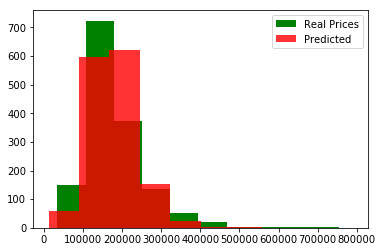

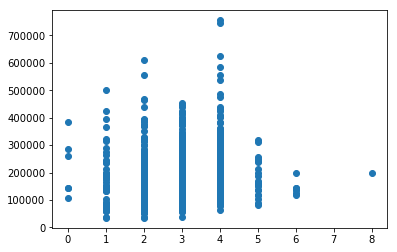

In [56]:
## Predicting the sale prices using the training data set:

from matplotlib import pyplot as plt
plt.figure(1)
plt.hist(Y,color= 'green', label='Real Prices')
plt.hist(nn.predict(X), color = 'red',alpha=0.8,label = 'Predicted')
plt.legend()
plt.show()

plt.figure(2)
plt.scatter(X['BedroomAbvGr'], Y)
plt.show()

In [ ]:
## Outputting X and Y as xlsl:
'''
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

writer2 = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')


# Convert the dataframe to an XlsxWriter Excel object.
train.to_excel(writer, sheet_name='Sheet1')

test.to_excel(writer2, sheet_name = 'Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()
writer2.save()
'''

In [54]:
np.mean(train['SalePrice']-n.predict(X))

514.5390039314074

In [ ]:
submissions = pd.DataFrame({'id': np.array(test.Id),'SalePrice': nn.predict(test) })


In [55]:
submissions

,SalePrice,id
0,165025.396715,1461
1,194954.447401,1462
2,201789.483614,1463
3,205145.186633,1464
4,185637.249002,1465
5,184543.784966,1466
6,185928.116036,1467
7,159112.651093,1468
8,192605.903282,1469
9,151810.095619,1470
